# CS6316 Project

# Application Project

Project Members:
Ajwa Shahid (ckf2dq), Ji Hyun Kim (mqa4qu), Nicki Choquette(nc2uzv)

# Extracting Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#cross validation libraries
from sklearn.model_selection import cross_validate, GridSearchCV

#decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

#random forest libraries
from sklearn.ensemble import RandomForestClassifier

#GradientBoosting libraries
from sklearn.ensemble import GradientBoostingClassifier

#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Data Processing
df1 = pd.read_csv('project3_dataset1.txt', sep="\t", header=None)
print(df1.shape)

df2 = pd.read_csv('project3_dataset2.txt', sep="\t", header=None)
print(df2.shape)

map2 = {"Absent" : 0, "Present" : 1}
df2.iloc[:,4] = df2.iloc[:,4].map(map2)

#features
X1 = df1.iloc[:, :-1]
X2 = df2.iloc[:, :-1]

#labels
y1 = df1.iloc[:, -1]
y2 = df2.iloc[:, -1]

(569, 31)
(462, 10)


# First Set of Tasks (first 45%)
**Note: 10-fold Cross Validation and tasks needing to apply to all algorithms are implemented under the corresponding algorithm**

## Cross Validation Evaluation Definition

https://scikit-learn.org/stable/modules/cross_validation.html#:~:text=The%20cross_validate%20function%20differs%20from,addition%20to%20the%20test%20score.

In [4]:
#cross_validation def
def cv1(X,y, clf):
  cv_outcome = cross_validate(clf, X,y, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
  print_outcome1(cv_outcome)

#outcome def
def print_outcome1(result):

  mean_test_accuracy = np.mean(result["test_accuracy"])
  mean_train_accuracy = np.mean(result["train_accuracy"])
  mean_test_precision = np.mean(result["test_precision"])
  mean_train_precision = np.mean(result["train_precision"])
  mean_test_recall = np.mean(result["test_recall"])
  mean_train_recall = np.mean(result["train_recall"])
  mean_test_f1 = np.mean(result["test_f1"])
  mean_train_f1 = np.mean(result["train_f1"])
  mean_test_auc = np.mean(result["test_roc_auc"])
  mean_train_auc = np.mean(result["train_roc_auc"])

  outcome_dict = {
      "Metric" : ["accuracy", "precision", "recall", "f1", "auc"],
      "Mean Train Score" : [mean_train_accuracy, mean_train_precision, mean_train_recall, mean_train_f1, mean_train_auc],
      "Mean Test Score" : [mean_test_accuracy, mean_test_precision, mean_test_recall, mean_test_f1, mean_test_auc]

  }

  outcome_df = pd.DataFrame(outcome_dict)
  print(outcome_df)

#plotting def

  plt.figure(figsize=(10, 6))
  plt.bar(outcome_df['Metric'], outcome_df['Mean Train Score'], width=0.4, label='Train Score', align='center') #training
  plt.bar(outcome_df['Metric'], outcome_df['Mean Test Score'], width=0.4, label='Test Score', align='edge') #testing
  plt.xlabel('Metrics')
  plt.ylabel('Scores')
  plt.legend()
  plt.show()

## Implementing Four Classification Algorithms

### **Logistic Regression**

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
df1 = pd.read_csv('project3_dataset1.txt', sep="\t", header=None)
print(df1.shape)

df2 = pd.read_csv('project3_dataset2.txt', sep="\t", header=None)
print(df2.shape)

(569, 31)
(462, 10)


In [7]:
# Separating labels column from features column

df_y1 = df1.iloc[:,-1:]
df_x1 = df1.iloc[:, :-1]

# Normalizing the Data
for i in range(0, 30):
  df_x1[i] = (df_x1[i] - df_x1[i].mean())/df_x1[i].std()

In [8]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

clf1 = LogisticRegression(penalty='l2', C=1.0)

In [9]:
lr_test_accs = []
lr_train_accs = []
list_C = [0.001, 0.01, 0.1, 1, 10, 100]
for i in list_C:
  lr = LogisticRegression(penalty='l2', C=i)
  cv_outcome = cross_validate(lr, df_x1, df_y1, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
  lr_test_accs.append(np.mean(cv_outcome["test_accuracy"]))
  lr_train_accs.append(np.mean(cv_outcome["train_accuracy"]))

In [10]:
print(max(lr_test_accs))
print("Best C Value:", list_C[lr_test_accs.index(max(lr_test_accs))])

0.9824561403508772
Best C Value: 1


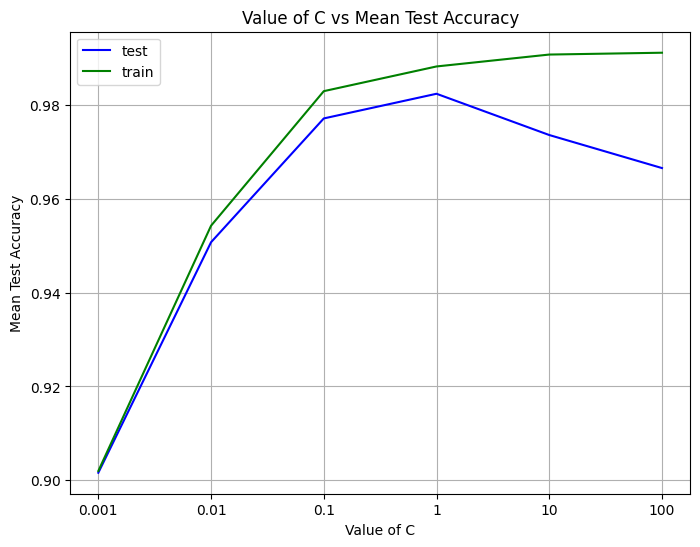

In [11]:
list_C_string = ['0.001', '0.01', '0.1', '1', '10', '100']
plt.figure(figsize=(8, 6))
plt.plot(list_C_string, lr_test_accs, color='b', label='test')
plt.plot(list_C_string, lr_train_accs, color='g', label='train')
plt.legend(loc='upper left')
plt.xlabel('Value of C')
plt.ylabel('Mean Test Accuracy')
plt.title('Value of C vs Mean Test Accuracy')
plt.grid(True)
plt.show()

      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.988284         0.982456
1  precision          0.992550         0.981366
2     recall          0.975889         0.971429
3         f1          0.984142         0.976175
4        auc          0.997519         0.994976


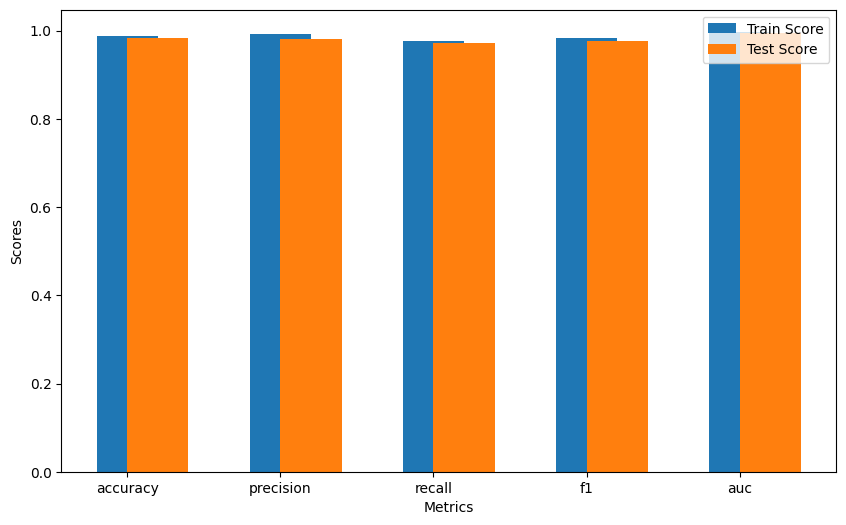

In [12]:
cv1(df_x1, df_y1, clf1)

In [13]:
# cannot do the same because features have string and different data types
# will have to convert all features to numbers

#have to change column 4 to numbers
map2 = {"Absent" : 0, "Present" : 1}
df2.iloc[:,4] = df2.iloc[:,4].map(map2)
# print(df2)

df_y2 = df2.iloc[:,-1:]
df_x2 = df2.iloc[:,:-1]

# print(df_x2)

# Normalizing Data
for i in range(0, 9):
  df_x2[i] = (df_x2[i] - df_x2[i].mean())/df_x2[i].std()

# print(df_x2)

In [14]:
lr_test_accs2 = []
lr_train_accs2 = []
list_C2 = [0.001, 0.01, 0.1, 1, 10, 100]
for i in list_C2:
  lr2 = LogisticRegression(penalty='l2', C=i)
  cv_outcome = cross_validate(lr2, df_x2, df_y2, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
  lr_test_accs2.append(np.mean(cv_outcome["test_accuracy"]))
  lr_train_accs2.append(np.mean(cv_outcome["train_accuracy"]))

In [15]:
print(max(lr_test_accs2))
print("Best C Value:", list_C[lr_test_accs2.index(max(lr_test_accs2))])

0.7251156336725254
Best C Value: 0.1


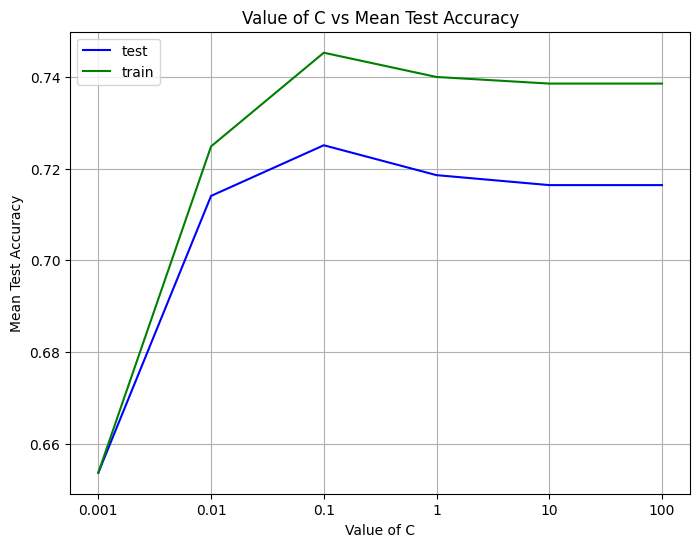

In [16]:
list_C_string = ['0.001', '0.01', '0.1', '1', '10', '100']
plt.figure(figsize=(8, 6))
plt.plot(list_C_string, lr_test_accs2, color='b', label='test')
plt.plot(list_C_string, lr_train_accs2, color='g', label='train')
plt.legend(loc='upper left')
plt.xlabel('Value of C')
plt.ylabel('Mean Test Accuracy')
plt.title('Value of C vs Mean Test Accuracy')
plt.grid(True)
plt.show()

      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.745310         0.725116
1  precision          0.671571         0.647543
2     recall          0.518056         0.493750
3         f1          0.584824         0.547595
4        auc          0.795515         0.777298


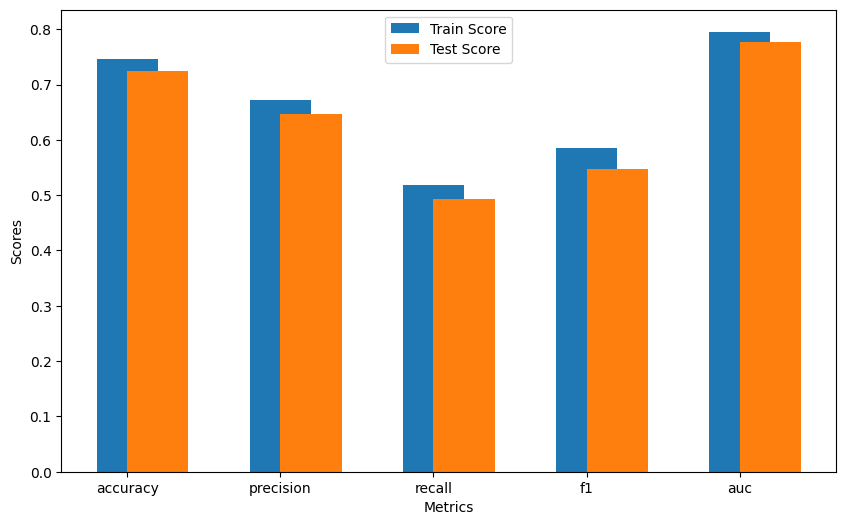

In [17]:
clf2 = LogisticRegression(penalty='l2', C=0.1)
cv1(df_x2, df_y2, clf2)

### **K Nearest Neighbors**

In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.981839         0.963095
1  precision          0.995634         0.981997
2     recall          0.955445         0.919481
3         f1          0.975115         0.947738
4        auc          0.998589         0.980250


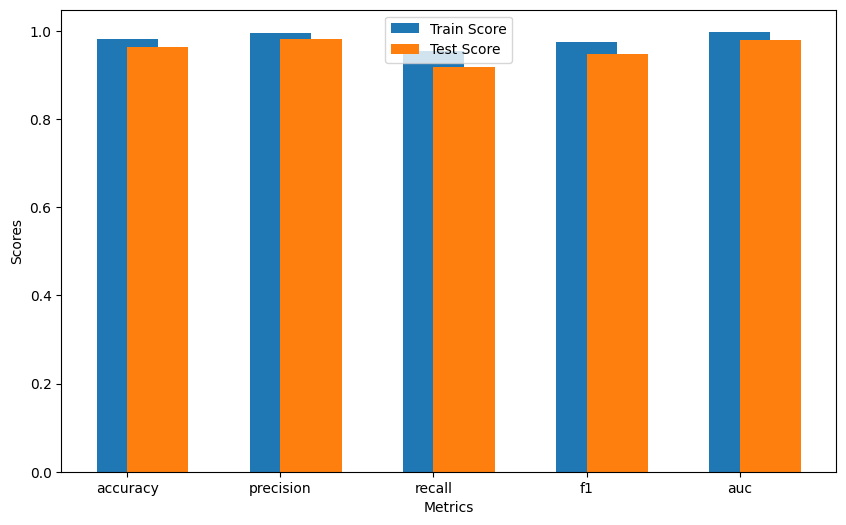

In [19]:
cv1(df_x1, df_y1, knn)

In [20]:
knn_test_accs = []
knn_train_accs = []
for i in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors=i)
  cv_outcome = cross_validate(knn, df_x1, df_y1, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
  knn_test_accs.append(np.mean(cv_outcome["test_accuracy"]))
  knn_train_accs.append(np.mean(cv_outcome["train_accuracy"]))

In [21]:
print(max(knn_test_accs))

0.9718984962406015


In [22]:
print(knn_test_accs.index(max(knn_test_accs))+1) #indexing start from 0

11


#### Mean Test Accuracy for Different Number of Neighbours - Dataset 1

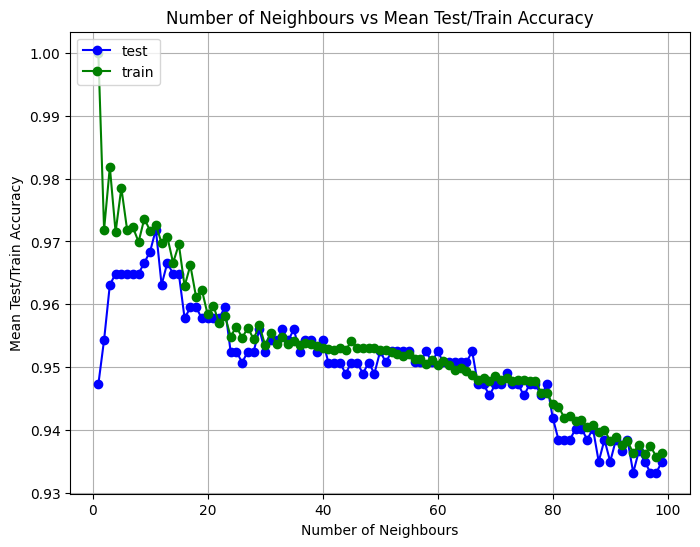

In [23]:
neighs = list(range(1, 100))
plt.figure(figsize=(8, 6))
plt.plot(neighs, knn_test_accs, color='b',  marker='o', label='test')
plt.plot(neighs, knn_train_accs, color='g',  marker='o', label='train')
plt.legend(loc='upper left')
plt.xlabel('Number of Neighbours')
plt.ylabel('Mean Test/Train Accuracy')
plt.title('Number of Neighbours vs Mean Test/Train Accuracy')
plt.grid(True)
plt.show()


      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.972662         0.971898
1  precision          0.989499         0.990909
2     recall          0.936580         0.933766
3         f1          0.962295         0.960521
4        auc          0.996117         0.993058


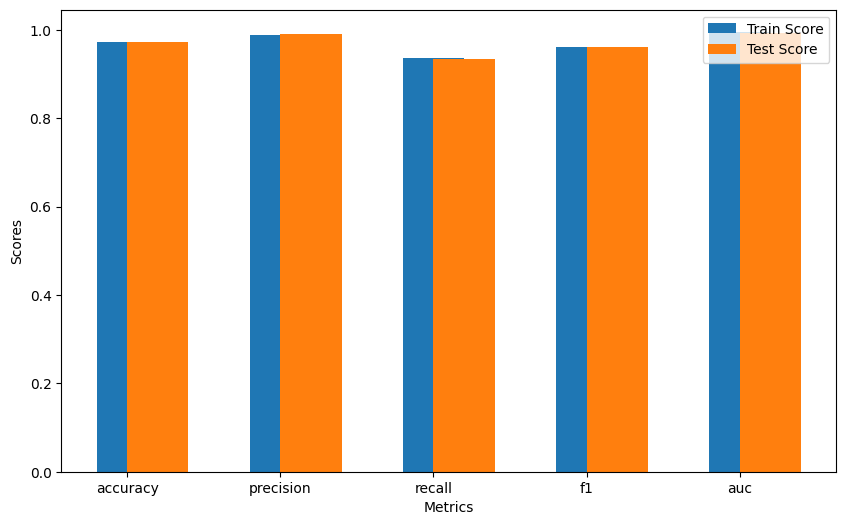

In [24]:
knn = KNeighborsClassifier(n_neighbors=11)
cv1(df_x1, df_y1, knn)

In [25]:
knn_test_accs2 = []
knn_train_accs2 = []
for i in range(1, 100):
  knn2 = KNeighborsClassifier(n_neighbors=i)
  cv_outcome = cross_validate(knn2, df_x2, df_y2, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
  knn_test_accs2.append(np.mean(cv_outcome["test_accuracy"]))
  knn_train_accs2.append(np.mean(cv_outcome["train_accuracy"]))

In [26]:
print(max(knn_test_accs2))

0.727335800185014


In [27]:
print(knn_test_accs2.index(max(knn_test_accs2))+1) #indexing start from 0

25


#### Mean Test Accuracy for Different Number of Neighbours - Dataset 2

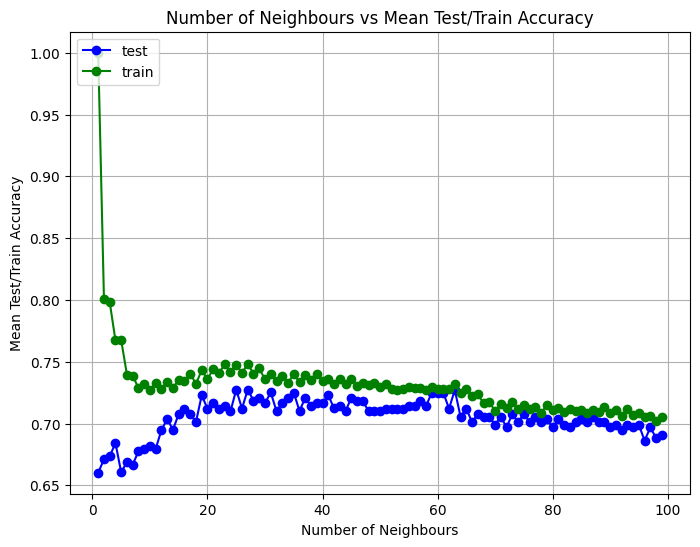

In [28]:
neighs = list(range(1, 100))
plt.figure(figsize=(8, 6))
plt.plot(neighs, knn_test_accs2, color='b',  marker='o', label='test')
plt.plot(neighs, knn_train_accs2, color='g',  marker='o', label='train')
plt.legend(loc='upper left')
plt.xlabel('Number of Neighbours')
plt.ylabel('Mean Test/Train Accuracy')
plt.title('Number of Neighbours vs Mean Test/Train Accuracy')
plt.grid(True)
plt.show()

      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.747719         0.727336
1  precision          0.738649         0.696883
2     recall          0.421528         0.393750
3         f1          0.535752         0.487000
4        auc          0.790391         0.753958


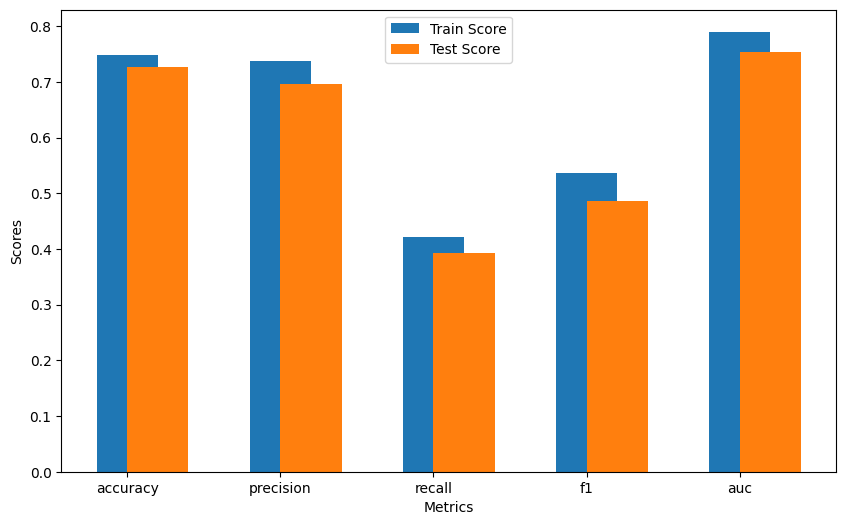

In [29]:
knn2 = KNeighborsClassifier(n_neighbors=25)
cv1(df_x2, df_y2, knn2)

### **SVM**

In [30]:
# References:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.svm import SVC

params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10]
}

svm1 = SVC()

search = GridSearchCV(estimator=svm1, param_grid=params, cv=10, scoring='accuracy')


In [31]:
search.fit(df_x1, df_y1)
best_params = search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.987893         0.982456
1  precision          0.998387         0.995455
2     recall          0.969080         0.957359
3         f1          0.983508         0.975471
4        auc          0.998087         0.996429


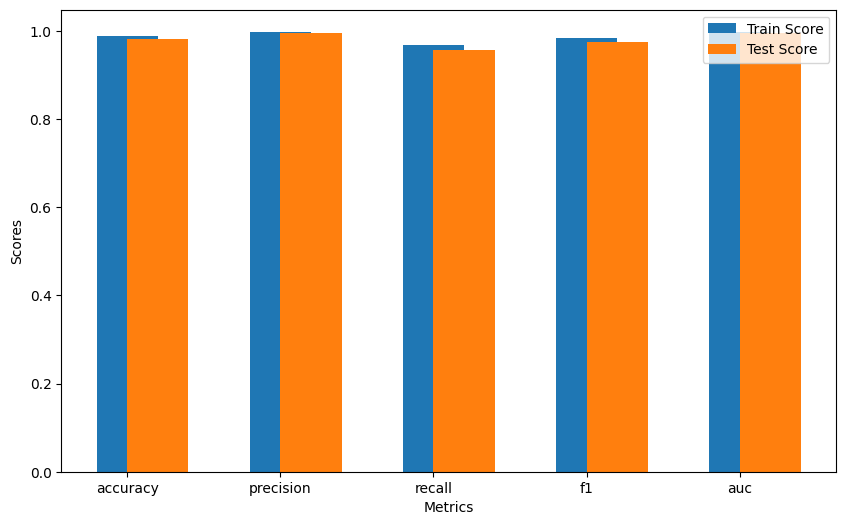

In [32]:
svm1 = SVC(kernel = 'rbf', gamma = 0.01, C=10)

cv1(df_x1, df_y1, svm1)

In [33]:
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10]
}

svm2 = SVC()

search = GridSearchCV(estimator=svm2, param_grid=params, cv=10, scoring='accuracy')

In [34]:
search.fit(df_x2, df_y2)
best_params = search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.772008         0.738067
1  precision          0.729841         0.684401
2     recall          0.543056         0.481250
3         f1          0.622361         0.549867
4        auc          0.816257         0.778898


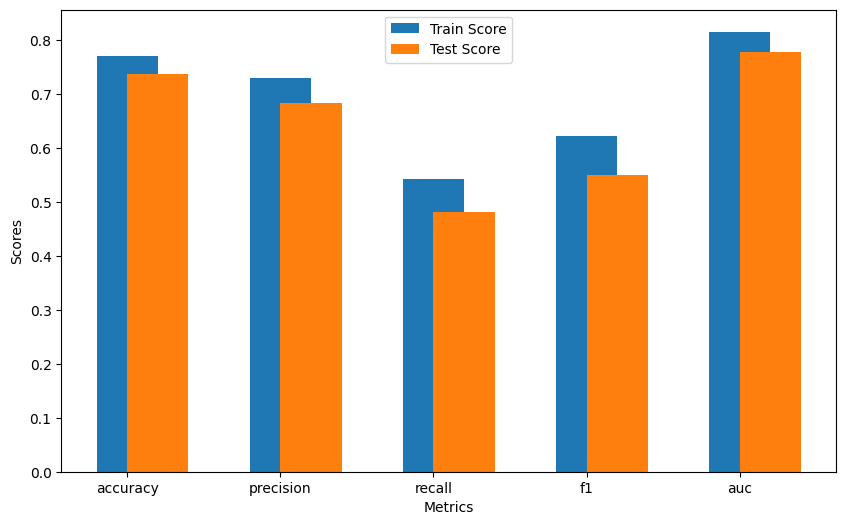

In [35]:
svm2 = SVC(kernel = 'rbf', gamma = 0.01, C=10)

cv1(df_x2, df_y2, svm2)

### **Decision Tree**

Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

      Metric  Mean Train Score  Mean Test Score
0   accuracy               1.0         0.934962
1  precision               1.0         0.923295
2     recall               1.0         0.905628
3         f1               1.0         0.913024
4        auc               1.0         0.928846


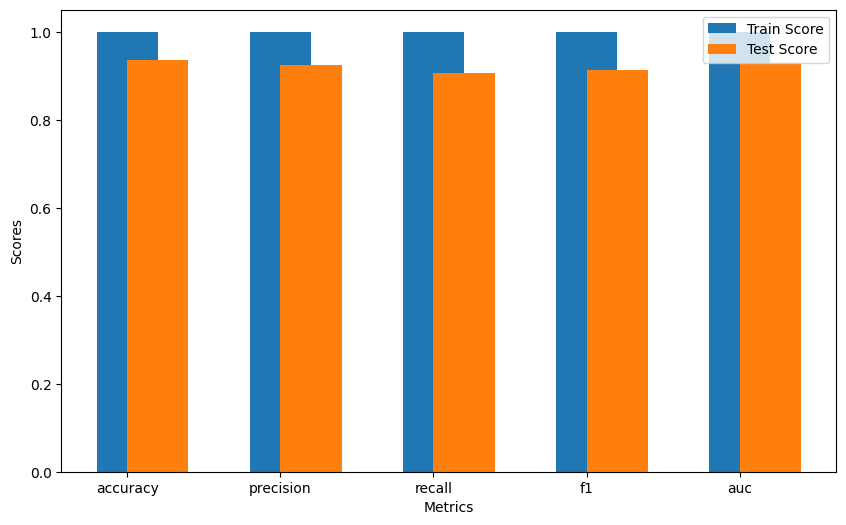

      Metric  Mean Train Score  Mean Test Score
0   accuracy               1.0         0.638575
1  precision               1.0         0.482046
2     recall               1.0         0.468750
3         f1               1.0         0.471129
4        auc               1.0         0.598730


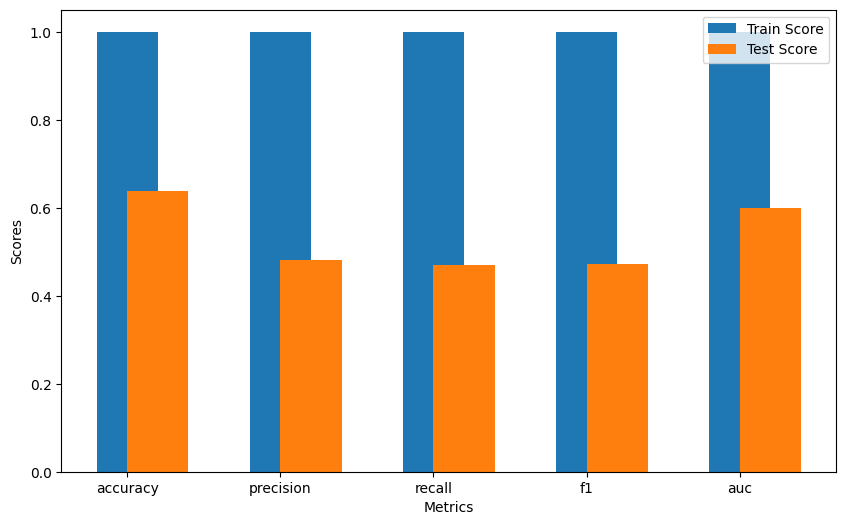

      Metric  Mean Train Score  Mean Test Score
0   accuracy               1.0         0.915664
1  precision               1.0         0.890261
2     recall               1.0         0.891558
3         f1               1.0         0.887662
4        auc               1.0         0.910581


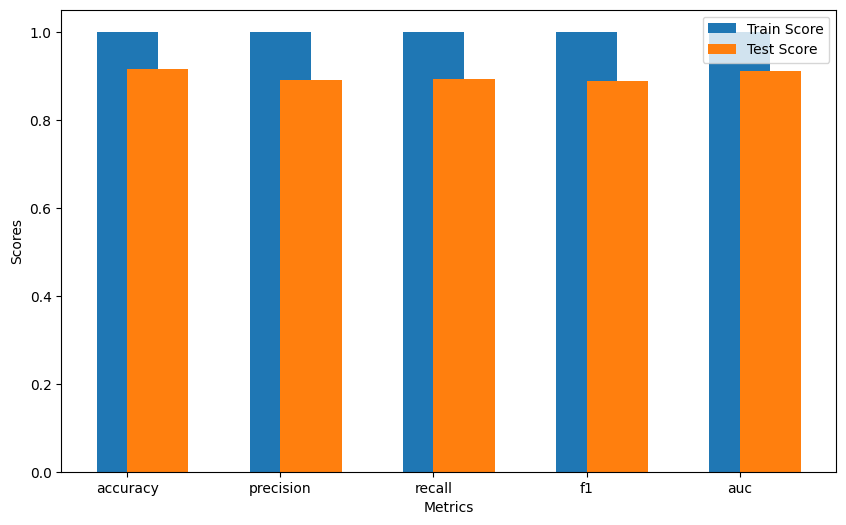

      Metric  Mean Train Score  Mean Test Score
0   accuracy               1.0         0.616790
1  precision               1.0         0.457397
2     recall               1.0         0.456250
3         f1               1.0         0.454620
4        auc               1.0         0.579093


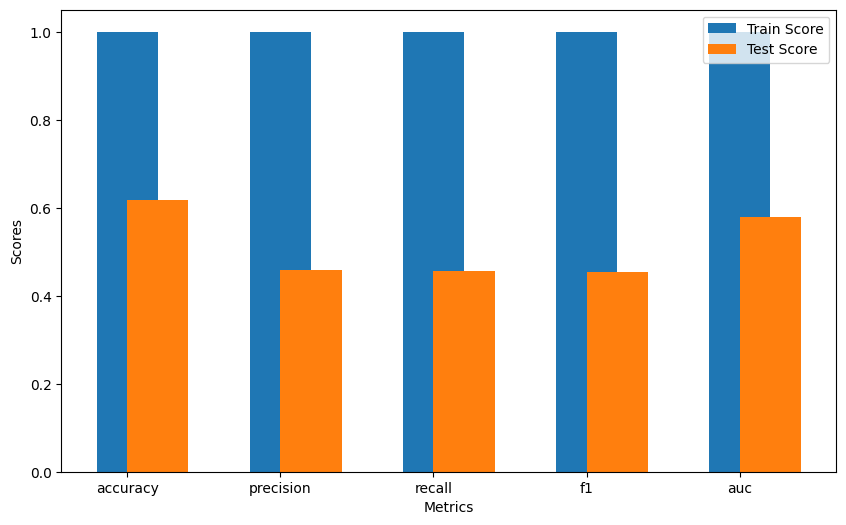

In [40]:
dt_e = DecisionTreeClassifier(criterion="entropy", random_state = 20)
cv1(X1,y1, dt_e)

dt_e2 = DecisionTreeClassifier(criterion="entropy", random_state = 20)
cv1(X2,y2, dt_e2)

dt = DecisionTreeClassifier(random_state = 20)
cv1(X1,y1, dt)

dt2 = DecisionTreeClassifier(random_state = 20)
cv1(X2,y2, dt2)

Dataset 1 Best Model - Depth: 4, Leaf: 10, Accuracy: 0.9419799498746867

Result for Decision Tree Dataset 1
      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.964070         0.941980
1  precision          0.967200         0.942512
2     recall          0.936051         0.901299
3         f1          0.950883         0.920760
4        auc          0.995152         0.963000


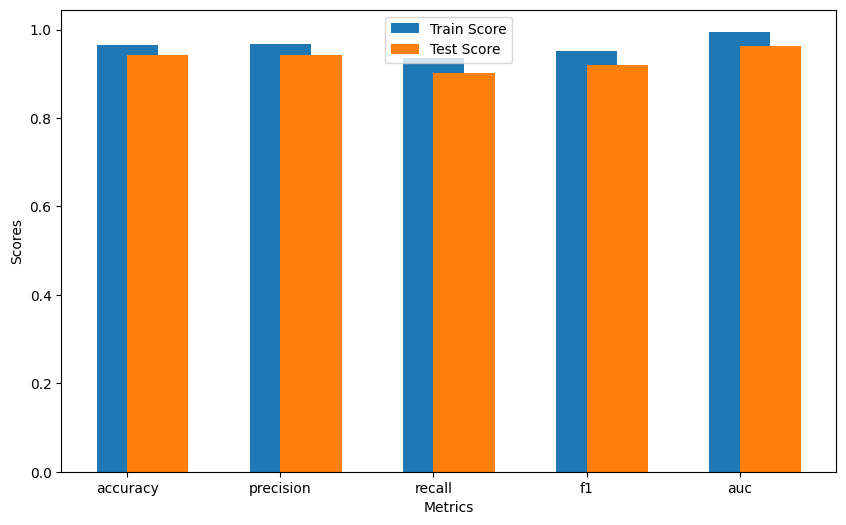

In [56]:
#decision tree hyperparameters
max_depth = list(range(1, 20))
min_samples_leaf = list(range(1, 20))

#Dataset 1

#loop through hyperparameters
best_accuracy_dt1 = 0
best_params_dt1 = {}

for depth in max_depth:
  for leaf in min_samples_leaf:
    dt1 = DecisionTreeClassifier(criterion="entropy", random_state = 0, max_depth=depth, min_samples_leaf=leaf)
    dt1_cv_outcome = cross_validate(dt1, X1,y1, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
    mean_test_accuracy = np.mean(dt1_cv_outcome["test_accuracy"])
    # print(f"Depth: {depth}, Leaf: {leaf}, Accuracy: {mean_test_accuracy}")

    if mean_test_accuracy > best_accuracy_dt1:
            best_accuracy_dt1 = mean_test_accuracy
            best_params_dt1 = {'max_depth': depth, 'min_samples_leaf': leaf}

#best accuracy and hyperparameters
print(f"Dataset 1 Best Model - Depth: {best_params_dt1['max_depth']}, Leaf: {best_params_dt1['min_samples_leaf']}, Accuracy: {best_accuracy_dt1}")
print("\nResult for Decision Tree Dataset 1")
dt1_best = DecisionTreeClassifier(criterion="entropy",max_depth=best_params_dt1['max_depth'],min_samples_leaf=best_params_dt1['min_samples_leaf'], random_state = 0)
cv1(X1,y1, dt1_best)

Dataset 2 Best Model - Depth: 3, Leaf: 10, Accuracy: 0.7230342275670676

Result for Decision Tree Dataset 2
      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.757331         0.723034
1  precision          0.706577         0.648194
2     recall          0.517361         0.468750
3         f1          0.594145         0.530690
4        auc          0.789992         0.710870


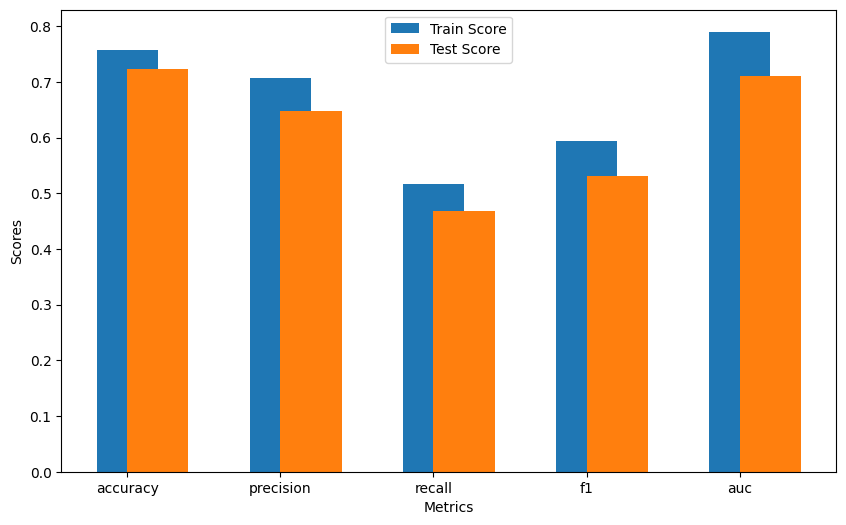

In [57]:
#Dataset 2

#loop through hyperparameters
best_accuracy_dt2 = 0
best_params_dt2 = {}

for depth in max_depth:
  for leaf in min_samples_leaf:
    dt2 = DecisionTreeClassifier(criterion="entropy", random_state = 0, max_depth=depth, min_samples_leaf=leaf)
    dt2_cv_outcome = cross_validate(dt2, X2,y2, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
    mean_test_accuracy = np.mean(dt2_cv_outcome["test_accuracy"])
    # print(f"Depth: {depth}, Leaf: {leaf}, Accuracy: {mean_test_accuracy}")

    if mean_test_accuracy > best_accuracy_dt2:
            best_accuracy_dt2 = mean_test_accuracy
            best_params_dt2 = {'max_depth': depth, 'min_samples_leaf': leaf}

#best accuracy and hyperparameters
print(f"Dataset 2 Best Model - Depth: {best_params_dt2['max_depth']}, Leaf: {best_params_dt2['min_samples_leaf']}, Accuracy: {best_accuracy_dt2}")
print("\nResult for Decision Tree Dataset 2")
dt2_best = DecisionTreeClassifier(criterion="entropy",max_depth=best_params_dt2['max_depth'],min_samples_leaf=best_params_dt2['min_samples_leaf'], random_state = 0)
cv1(X2,y2, dt2_best)

## Implement Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

hyperparameters
https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1#:~:text=max_depth%3A%20The%20number%20of%20splits,3%2C%205%2C%20or%207.

Mean Test Accuracy is: 0.9683270676691729
best n_estimator is: 51


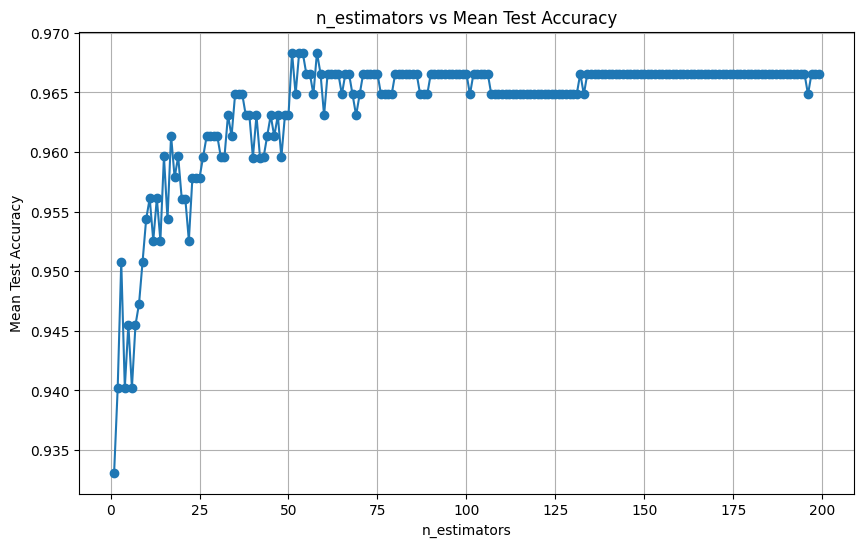

Mean Test Accuracy is: 0.7119796484736355
best n_estimator is: 64


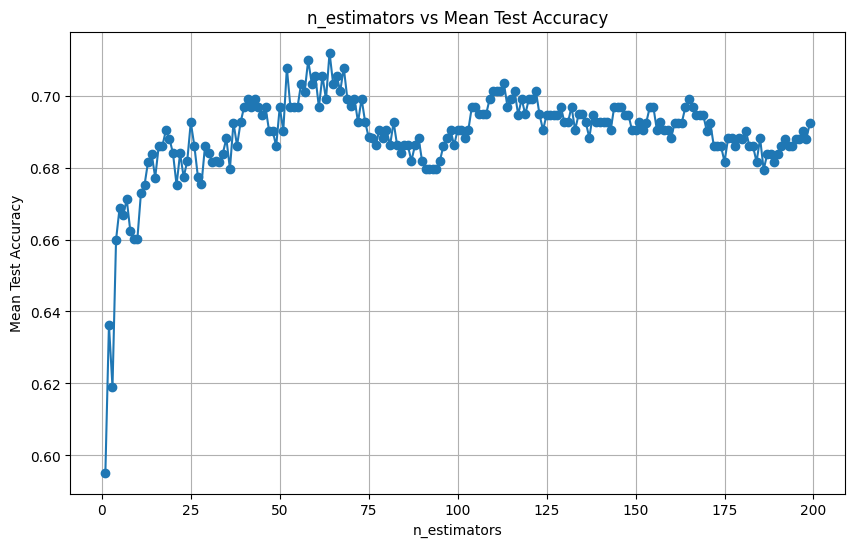

In [58]:
#random forest hyperparameter
# n_estimators = list(range(1, 200))
# Dataset 1: best 51, accuracy 0.9683270676691729

#Dataset 1

#loop through hyperparameter
rf_accs_1 = []
for i in range(1, 200):
  rf1 = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=i)
  cv_outcome = cross_validate(rf1, X1,y1, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
  rf_accs_1.append(np.mean(cv_outcome["test_accuracy"]))

best_acc_rf1 = max(rf_accs_1)
best_n_rf1 = rf_accs_1.index(max(rf_accs_1))+1
print(f"Mean Test Accuracy is: {best_acc_rf1}")
print(f"best n_estimator is: {best_n_rf1}") #indexing start from 0


estimators = list(range(1, 200))

plt.figure(figsize=(10, 6))
plt.plot(estimators, rf_accs_1, marker='o', linestyle='-')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Accuracy')
plt.title('n_estimators vs Mean Test Accuracy')
plt.grid(True)
plt.show()

#Dataset 2

#loop through hyperparameter
rf_accs_2 = []
for i in range(1, 200):
  rf2 = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=i)
  cv_outcome = cross_validate(rf2, X2,y2, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
  rf_accs_2.append(np.mean(cv_outcome["test_accuracy"]))

best_acc_rf2 = max(rf_accs_2)
best_n_rf2 = rf_accs_2.index(max(rf_accs_2))+1
print(f"Mean Test Accuracy is: {best_acc_rf2}")
print(f"best n_estimator is: {best_n_rf2}") #indexing start from 0


estimators = list(range(1, 200))

plt.figure(figsize=(10, 6))
plt.plot(estimators, rf_accs_2, marker='o', linestyle='-')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Accuracy')
plt.title('n_estimators vs Mean Test Accuracy')
plt.grid(True)
plt.show()

Dataset 1 Best Model - Depth: 7, n_estimator: 17, Accuracy: 0.9701441102756891

Result for Random Forest Dataset 1
      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.999414         0.970144
1  precision          1.000000         0.971896
2     recall          0.998427         0.948268
3         f1          0.999211         0.959030
4        auc          0.999998         0.990094


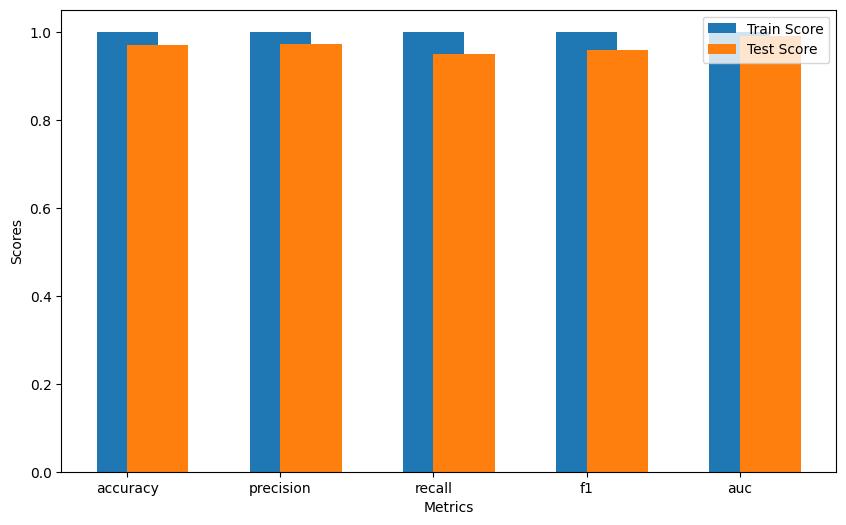

In [59]:
#random forest hyperparameters
n_estimators = list(range(10, 100))
max_depth = list(range(1, 30)) # number of splits allowed -> too low=underfit / too high=overfit

#Dataset 1

#loop through hyperparameters
best_accuracy_rf1 = 0
best_params_rf1 = {}

for depth in max_depth:
  for n in n_estimators:
    rf1 = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=n, max_depth=depth)
    rf1_cv_outcome = cross_validate(rf1, X1,y1, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
    mean_test_accuracy = np.mean(rf1_cv_outcome["test_accuracy"])
    # print(f"Depth: {depth}, Leaf: {leaf}, Accuracy: {mean_test_accuracy}")

    if mean_test_accuracy > best_accuracy_rf1:
            best_accuracy_rf1 = mean_test_accuracy
            best_params_rf1 = {'max_depth': depth, 'n_estimator': n}

#best accuracy and hyperparameters
print(f"Dataset 1 Best Model - Depth: {best_params_rf1['max_depth']}, n_estimator: {best_params_rf1['n_estimator']}, Accuracy: {best_accuracy_rf1}")
print("\nResult for Random Forest Dataset 1")
rf1_best = RandomForestClassifier(criterion="entropy",max_depth=best_params_rf1['max_depth'],n_estimators=best_params_rf1['n_estimator'], random_state = 0)
cv1(X1,y1, rf1_best)

Dataset 2 Best Model - Depth: 3, n_estimator: 38, Accuracy: 0.724976873265495

Result for Random Forest Dataset 2
      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.778016         0.724977
1  precision          0.793709         0.682411
2     recall          0.486806         0.393750
3         f1          0.602483         0.488774
4        auc          0.853746         0.752970


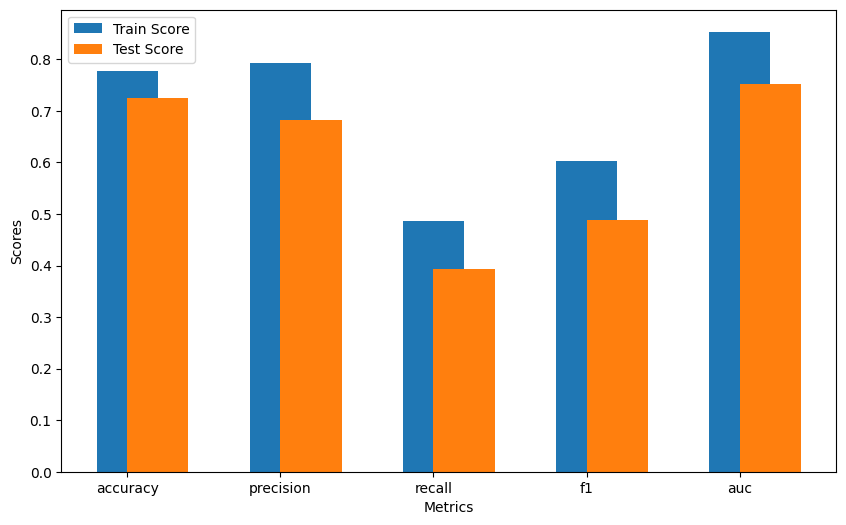

In [60]:
#Dataset 2

#loop through hyperparameters
best_accuracy_rf2 = 0
best_params_rf2 = {}

for depth in max_depth:
  for n in n_estimators:
    rf2 = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=n, max_depth=depth)
    rf2_cv_outcome = cross_validate(rf2, X2,y2, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
    mean_test_accuracy = np.mean(rf2_cv_outcome["test_accuracy"])
    # print(f"Depth: {depth}, Leaf: {leaf}, Accuracy: {mean_test_accuracy}")

    if mean_test_accuracy > best_accuracy_rf2:
            best_accuracy_rf2 = mean_test_accuracy
            best_params_rf2 = {'max_depth': depth, 'n_estimator': n}

#best accuracy and hyperparameters
print(f"Dataset 2 Best Model - Depth: {best_params_rf2['max_depth']}, n_estimator: {best_params_rf2['n_estimator']}, Accuracy: {best_accuracy_rf2}")
print("\nResult for Random Forest Dataset 2")
rf2_best = RandomForestClassifier(criterion="entropy",max_depth=best_params_rf2['max_depth'],n_estimators=best_params_rf2['n_estimator'], random_state = 0)
cv1(X2,y2, rf2_best)

## Implement Boosting

AdaBoostClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

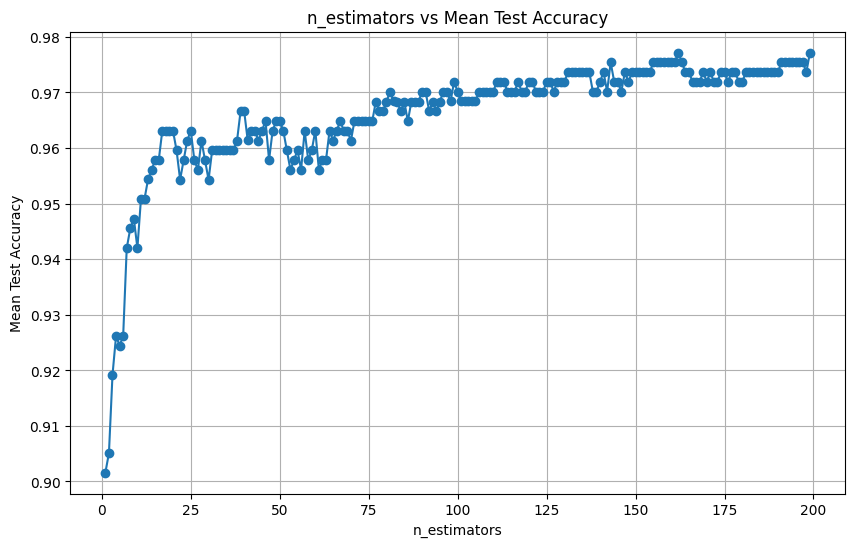


Result for AdaBoost Dataset 1
The best n_estimator is: 162
      Metric  Mean Train Score  Mean Test Score
0   accuracy               1.0         0.977162
1  precision               1.0         0.985429
2     recall               1.0         0.952597
3         f1               1.0         0.968392
4        auc               1.0         0.993257


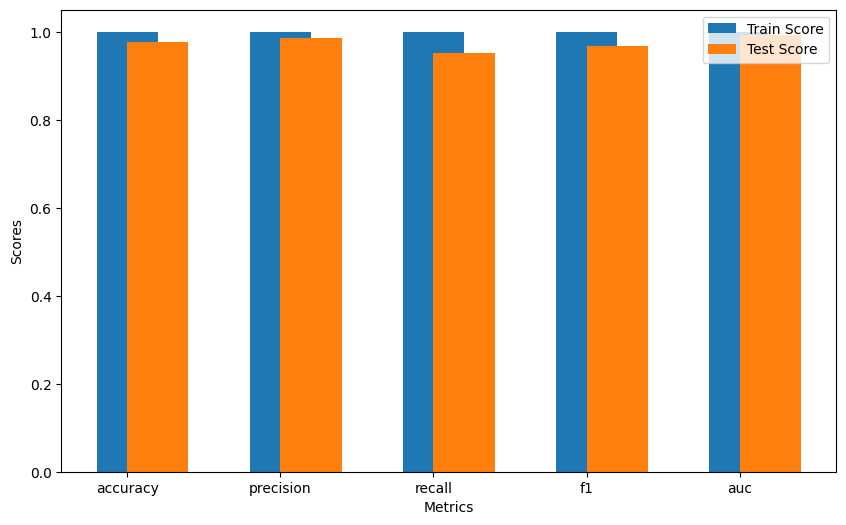

In [36]:
#AdaBoost hyperparameter

#Dataset 1

#loop through hyperparameter
ada_accs_1 = []
for i in range(1, 200):
  ada1 = AdaBoostClassifier(random_state=0, n_estimators=i)
  cv_outcome = cross_validate(ada1, X1,y1, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
  ada_accs_1.append(np.mean(cv_outcome["test_accuracy"]))

estimators = list(range(1, 200))
plt.figure(figsize=(10, 6))
plt.plot(estimators, ada_accs_1, marker='o', linestyle='-')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Accuracy')
plt.title('n_estimators vs Mean Test Accuracy')
plt.grid(True)
plt.show()

print("\nResult for AdaBoost Dataset 1")
best_n_estimator = ada_accs_1.index(max(ada_accs_1))+1
print(f"The best n_estimator is: {best_n_estimator}")
abst1 = AdaBoostClassifier(n_estimators=best_n_estimator, random_state = 0)
cv1(X1,y1, abst1)

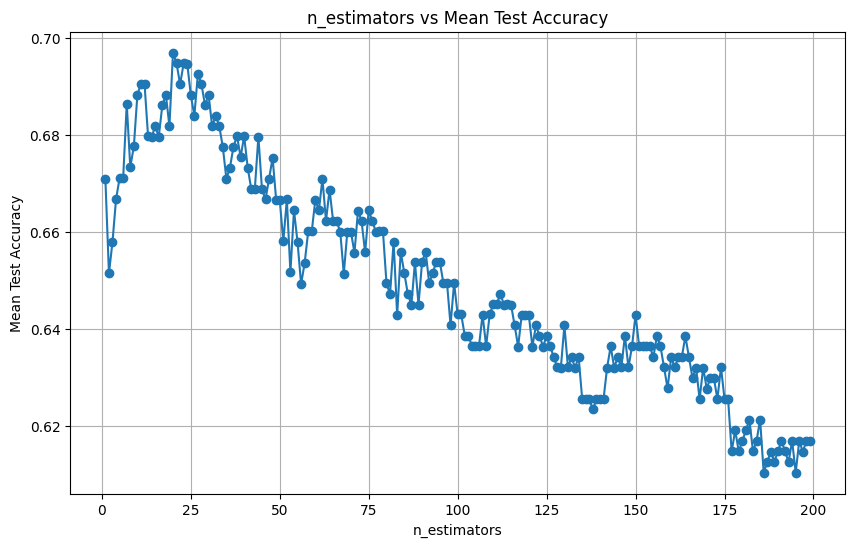


Result for AdaBoost Dataset 2
The best n_estimator is: 20
      Metric  Mean Train Score  Mean Test Score
0   accuracy          0.788832         0.696901
1  precision          0.723765         0.577149
2     recall          0.632639         0.531250
3         f1          0.674640         0.541320
4        auc          0.864420         0.736092


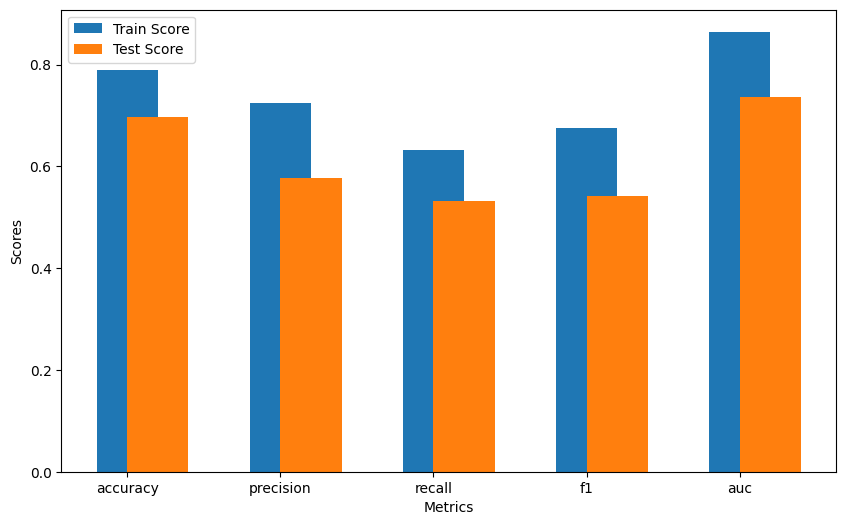

In [37]:
#Dataset 2

#loop through hyperparameter
ada_accs_2 = []
for i in range(1, 200):
  ada2 = AdaBoostClassifier(random_state=0, n_estimators=i)
  cv_outcome = cross_validate(ada2, X2,y2, scoring=('accuracy','precision','recall','f1','roc_auc'), return_train_score=True, cv=10)
  ada_accs_2.append(np.mean(cv_outcome["test_accuracy"]))

estimators = list(range(1, 200))
plt.figure(figsize=(10, 6))
plt.plot(estimators, ada_accs_2, marker='o', linestyle='-')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Accuracy')
plt.title('n_estimators vs Mean Test Accuracy')
plt.grid(True)
plt.show()

print("\nResult for AdaBoost Dataset 2")
best_n_estimator = ada_accs_2.index(max(ada_accs_2))+1
print(f"The best n_estimator is: {best_n_estimator}")
abst2 = AdaBoostClassifier(n_estimators=best_n_estimator, random_state = 0)
cv1(X2,y2, abst2)

# Neural Network (second 45%)

References:

https://discuss.pytorch.org/t/how-are-layer-weights-and-biases-initialized-by-default/13073

https://discuss.pytorch.org/t/whats-the-default-initialization-methods-for-layers/3157

https://github.com/pytorch/pytorch/blob/d954ef208f88f9b0ec1aef73edcd2149cc7845fa/torch/nn/modules/linear.py#L49

https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.xavier_normal_

https://pytorch.org/docs/stable/generated/torch.nn.functional.sigmoid.html

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#:~:text=Note%20that%20this%20case%20is%20equivalent%20to%20applying%20LogSoftmax%20on%20an%20input%2C%20followed%20by%20NLLLoss

https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

#### Imports

In [4]:
import os
import torch
import torch.nn as nn # neural network
import torch.nn.functional as F
from torch.nn import Sigmoid
from torch.nn import Softmax
from torch.nn import CrossEntropyLoss # Cross Entropy Loss
import mnist_loader

c:\Users\nicki\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Loading Data

In [5]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data) 

#### Defining Base Neural Network

In [6]:
class Net(nn.Module):

    def __init__(self, h_1_o_s=256, h_2_o_s=128, w=None, b=[1, 1], lr=0.5): # def __init__(self, hyperparam):
      super(Net, self).__init__()

      self.hidden_1_output_size=h_1_o_s
      self.hidden_2_output_size=h_2_o_s
      self.specified_weights=w
      self.specified_biases=b
      self.learning_rate = lr

      self.to_hidden_1 = nn.Linear(784, self.hidden_1_output_size, bias=self.specified_biases[0]) # "hidden unit" corresponds to these inputs/outputs -- can change to self.to_hidden_1 = nn.Linear(784, hyperparam)
      self.to_hidden_2 = nn.Linear(self.hidden_1_output_size, self.hidden_2_output_size, bias=self.specified_biases[1])
      self.to_output = nn.Linear(self.hidden_2_output_size, 10)

      if self.specified_weights != None:
        if "hidden_1" in self.specified_weights:
          nn.init.xavier_normal_(self.to_hidden_1.weight) # this would initialize the weight
        if "hidden_2" in self.specified_weights:
          nn.init.xavier_normal_(self.to_hidden_2.weight)     
      

      # self.to_hidden_1.bias

    def forward(self, x):
      x = F.elu(self.to_hidden_1(x))
      x = F.sigmoid(x) # Sigmoid activation function # note sigmoid should be called after any (every) layer
      x = F.elu(self.to_hidden_2(x))
      x = F.sigmoid(x)
      x = F.elu(self.to_output(x))

      return x

#### Defining hyperparameter options

In [7]:
# defining hyperparameters
hidden_1_output_sizes = [256, 392]
hidden_2_output_sizes = [128, 196]
learning_rates = [0.25, 0.5, 0.75]
weights = [None, ["hidden_1"], ["hidden_2"], ["hidden_1", "hidden_2"]]
biases = [[1, 1], [1, 0], [0, 1], [0, 0]]

#### Creating all model variations

In [8]:
models = []

for sizes in range(len(hidden_1_output_sizes)):
    for lrt in range(len(learning_rates)):
        for wt in range(len(weights)):
            for bias in range(len(biases)):
                model = Net(h_1_o_s=hidden_1_output_sizes[sizes], h_2_o_s=hidden_2_output_sizes[sizes], w=weights[wt], b=biases[bias], lr=learning_rates[lrt])
                models.append(model)

#### Training function to train models

In [9]:
def training(model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    optimizer = torch.optim.SGD(model.parameters(), lr=model.learning_rate) # learning rate
    CE = CrossEntropyLoss()

    epochs = 3
    all_epoch_loss = 0
    for epoch in range(epochs):
        tot_loss = 0
        for x, label in training_data:
            # print("iteration")
            x = torch.from_numpy(x)
            x = x.view(1, 784)
            label = torch.from_numpy(label)
            y = model(x)
            loss = CE(y, label.argmax().view(-1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            tot_loss = tot_loss + loss.data.cpu().numpy()
        print(epoch, ": Loss =", tot_loss/len(training_data))
        all_epoch_loss += (tot_loss/len(training_data))
    return "Average loss per epoch: " + str(all_epoch_loss/epochs)

#### Testing function for all models

In [10]:
def testing(model):
    sum = 0
    for x, label in test_data:
        x = torch.from_numpy(x)
        x = x.view(1, 784)
        y = model(x)

        if(y.argmax() == label):
            sum += 1

    accuracy = sum/len(test_data)
    return "Accuracy: " + str(accuracy)

#### Training and Testing All Models

##### Setting next output file so all results can be kept

In [11]:
base_file_name = "output"
f = base_file_name + ".txt"
while os.path.isfile(f):
    f = base_file_name + "_0.txt"

##### Actually Training and Testing All Models, prints results and saves results in next output file

In [12]:
with open(f, "a") as file:
    for model in models:
        print("Model Parameters: hidden_1_output_size =", model.hidden_1_output_size, ", hidden_2_output_size =", model.hidden_2_output_size, ", specified_weights =", model.specified_weights, ", specified_biases =", model.specified_biases, ", learning_rate =", model.learning_rate)
        file.write("Model Parameters: hidden_1_output_size = " + str(model.hidden_1_output_size) + ", hidden_2_output_size =" + str(model.hidden_2_output_size) + ", specified_weights = " + str(model.specified_weights) + ", specified_biases = " + str(model.specified_biases) + ", learning_rate = " + str(model.learning_rate) + "\n")
        loss = training(model)
        print(loss)
        file.write(loss + "\n")
        accuracy = testing(model)
        print(accuracy)
        file.write(accuracy + "\n")

Model Parameters: hidden_1_output_size = 256 , hidden_2_output_size = 128 , specified_weights = None , specified_biases = [1, 1] , learning_rate = 0.25


c:\Users\nicki\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 : Loss = 2.2532034194083153
1 : Loss = 1.6614827313822333
2 : Loss = 1.4883111461509329
Average loss per epoch: 1.8009990989804938
Accuracy: 0.3991
Model Parameters: hidden_1_output_size = 256 , hidden_2_output_size = 128 , specified_weights = None , specified_biases = [1, 0] , learning_rate = 0.25
0 : Loss = 2.0569901220397924
1 : Loss = 1.4290489138171156
2 : Loss = 1.6201990481617758
Average loss per epoch: 1.7020793613395613
Accuracy: 0.4381
Model Parameters: hidden_1_output_size = 256 , hidden_2_output_size = 128 , specified_weights = None , specified_biases = [0, 1] , learning_rate = 0.25
0 : Loss = 2.0395482952036947
1 : Loss = 1.33563249554832
2 : Loss = 1.8688852597921535
Average loss per epoch: 1.748022016848056
Accuracy: 0.2606
Model Parameters: hidden_1_output_size = 256 , hidden_2_output_size = 128 , specified_weights = None , specified_biases = [0, 0] , learning_rate = 0.25
0 : Loss = 1.9327445141864947
1 : Loss = 1.534200336358329
2 : Loss = 2.0539235529797764
Average 